In [ ]:

customer <- read_csv('https://raw.githubusercontent.com/ogut77/DataScience/refs/heads/main/PurchaseByCredit20_Continuous.csv')
customer


Rows: 20 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Purchase
dbl (2): Age, Income

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Income,Purchase
<dbl>,<dbl>,<chr>
25,150,Yes
34,220,No
27,210,No
28,250,Yes
21,100,No
31,220,No
36,300,Yes
20,100,No
29,220,No


In [ ]:
install.packages('MASS')
library(MASS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [ ]:
 ldamodel <- lda(Purchase ~ ., customer)
 ldamodel

In [ ]:

 pred <- predict(ldamodel, customer)

Call:
lda(Purchase ~ ., data = customer)

Prior probabilities of groups:
 No Yes 
0.6 0.4 

Group means:
       Age Income
No  27.250 200.00
Yes 33.125 291.25

Coefficients of linear discriminants:
               LD1
Age    0.173328870
Income 0.001994526

In [ ]:
pred$class

[1] No  Yes No  No  No  No  Yes No  No  No  Yes No  Yes No  Yes No  No  No  Yes
[20] No 
Levels: No Yes

In [ ]:
classtable <- table(Purchase,pred$class)
classtable

        
Purchase No Yes
     No  10   2
     Yes  4   4

In [ ]:
 sum(diag(classtable)) / sum(classtable)

[1] 0.7

In [ ]:
# prompt: write logistic regression in r

customer$Purchase <- ifelse(customer$Purchase == "Yes", 1, 0)


# Train a logistic regression model
logitmodel <- glm(Purchase ~ ., data = customer, family = binomial)
logitmodel


Call:  glm(formula = Purchase ~ ., family = binomial, data = customer)

Coefficients:
(Intercept)          Age       Income  
  -7.629959     0.223517     0.001918  

Degrees of Freedom: 19 Total (i.e. Null);  17 Residual
Null Deviance:	    26.92 
Residual Deviance: 20.68 	AIC: 26.68

Nearest **Neigbor**

In [ ]:
install.packages('DMwR')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘DMwR’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [ ]:
library(readr)
customer <- read_csv('https://raw.githubusercontent.com/ogut77/DataScience/refs/heads/main/PurchaseByCredit20_Continuous.csv')
customer

Rows: 20 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Purchase
dbl (2): Age, Income

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Income,Purchase
<dbl>,<dbl>,<chr>
25,150,Yes
34,220,No
27,210,No
28,250,Yes
21,100,No
31,220,No
36,300,Yes
20,100,No
29,220,No


In [ ]:
attach(customer)

The following objects are masked from customer (pos = 4):

    Age, Income, Purchase




In [ ]:
Purchase

[1] "Yes" "No"  "No"  "Yes" "No"  "No"  "Yes" "No"  "No"  "Yes" "Yes" "No" 
[13] "No"  "Yes" "Yes" "No"  "No"  "No"  "Yes" "No"

In [ ]:
library(DMwR2)
 nn <- kNN(Purchase ~ ., customer, customer, k=5)

ERROR: Error in class::knn(train[, -tgtCol], test[, -tgtCol], train[, tgtCol], : 'train' and 'class' have different lengths


In [ ]:
classtable <- table(Purchase, nn)
sum(diag(classtable)) / sum(classtable)

ERROR: Error: object 'nn' not found


**Neural Network**

In [ ]:
 install.packages('nnet')
 library(nnet)
 singleNNdata <- read.csv('https://raw.githubusercontent.com/ogut77/DataScience/refs/heads/main/singleNN.csv')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
attach(singleNNdata)

In [ ]:
 singleNNdata

x1,x2,x3,y
<int>,<int>,<int>,<int>
0,0,0,-1
0,0,1,-1
0,1,0,-1
0,1,1,1
1,0,0,-1
1,0,1,1
1,1,0,1
1,1,1,1


In [ ]:
# create a training data using the 8 data.
train <- singleNNdata[1:8,]
# create a testing data using the same 8 data
test <- singleNNdata[1:8,]
train.nnet <- nnet(y~x1+x2+x3,data=train, size=2, rang=0.1, decay=5e-4, maxit=100)
summary(train.nnet)

# weights:  11
initial  value 9.945813 
iter  10 value 7.902015
iter  20 value 6.775085
iter  30 value 4.152398
iter  40 value 4.130085
iter  50 value 4.129914
iter  60 value 4.129832
iter  70 value 4.129705
iter  80 value 4.129659
iter  90 value 4.129641
iter 100 value 4.129632
final  value 4.129632 
stopped after 100 iterations


a 3-2-1 network with 11 weights
options were - decay=5e-04
 b->h1 i1->h1 i2->h1 i3->h1 
  4.22  -3.11  -3.11  -3.11 
 b->h2 i1->h2 i2->h2 i3->h2 
  3.99  -2.97  -2.96  -2.97 
 b->o h1->o h2->o 
 4.61 -7.50 -7.02 

In [ ]:
predict(train.nnet,test)
nnetpred <- (predict(train.nnet,test) >= 0.01)


1,6.327925e-05
2,2.057801e-03
3,2.038969e-03
4,9.446234e-01
5,2.074247e-03
6,9.451265e-01
7,9.448574e-01
8,9.891801e-01


In [ ]:
table(nnetpred,y)

        y
nnetpred -1 1
   FALSE  4 0
   TRUE   0 4

# **Support Vector Machine**

In [ ]:
install.packages('e1071')
library(e1071)
svmdata <- read.csv('https://raw.githubusercontent.com/ogut77/DataScience/refs/heads/main/svmdata.csv', header=T, as.is=FALSE)
attach(svmdata)
svmdata

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

The following objects are masked from svmdata (pos = 7):

    x1, x2, y


The following objects are masked from singleNNdata:

    x1, x2, y




x1,x2,y
<int>,<int>,<int>
25,150,-1
34,220,1
26,210,-1
28,250,1
21,100,-1
31,220,1
36,300,1
20,100,-1


In [ ]:
# create a training data using the 8 data.
train <- svmdata[1:8,]
# create a testing data using the same 8 data
test <- svmdata[1:8,]

In [ ]:
train.svm = svm(y~x1+x2,type="C-classification", data=train)
train.svm


Call:
svm(formula = y ~ x1 + x2, data = train, type = "C-classification")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  6


In [ ]:
svmpred = predict(train.svm,test)
svmpred

1  2  3  4  5  6  7  8 
-1  1 -1  1 -1  1  1 -1 
Levels: -1 1

In [ ]:
z = table(svmpred,y)
z

       y
svmpred -1 1
     -1  4 0
     1   0 4

Warning message in plot.xy(xy, type, ...):
“font width unknown for character 0x01 in encoding latin1”
Warning message in plot.xy(xy, type, ...):
“font metrics unknown for character 0x01 in encoding latin1”
Warning message in plot.xy(xy, type, ...):
“font width unknown for character 0x01 in encoding latin1”
Warning message in plot.xy(xy, type, ...):
“font metrics unknown for character 0x01 in encoding latin1”
Warning message in plot.xy(xy, type, ...):
“font width unknown for character 0x01 in encoding latin1”
Warning message in plot.xy(xy, type, ...):
“font metrics unknown for character 0x01 in encoding latin1”
Warning message in plot.xy(xy, type, ...):
“font width unknown for character 0x01 in encoding latin1”
Warning message in plot.xy(xy, type, ...):
“font metrics unknown for character 0x01 in encoding latin1”


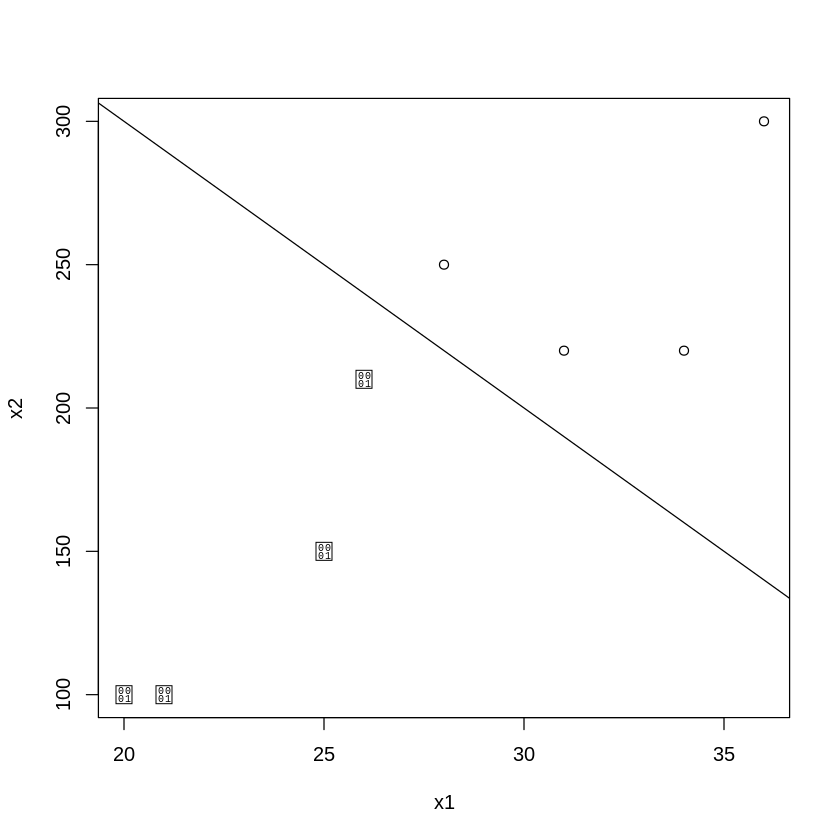

In [ ]:
plot(x1,x2,pch=y)
abline(500,-10)

# **Ensemble model**

## Bagging

In [ ]:
install.packages('adabag')
library(adabag)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘XML’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘iterators’, ‘rgl’, ‘rlist’, ‘gtools’, ‘caret’, ‘foreach’, ‘doParallel’, ‘ConsRank’


Loading required package: rpart

Loading required package: caret

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Loading required package: lattice

Loading required package: foreach

Loading required package: doParallel

Loading required package: iterators

Loading required package: parallel



In [ ]:
data(iris)
# mfinal is an integer which is the number of iterations for which boosting is run
iris.bagging <- bagging(Species~., data=iris, mfinal = 10)
# list the importance of variable in the classification
iris.bagging$importance

Petal.Length  Petal.Width Sepal.Length  Sepal.Width 
    81.24175     18.75825      0.00000      0.00000

In [ ]:
# list the trees grown along the iterations.
iris.bagging$trees

[[1]]
n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 92 virginica (0.24000000 0.37333333 0.38666667)  
  2) Petal.Width< 1.75 96 40 versicolor (0.37500000 0.58333333 0.04166667)  
    4) Petal.Length< 2.45 36  0 setosa (1.00000000 0.00000000 0.00000000) *
    5) Petal.Length>=2.45 60  4 versicolor (0.00000000 0.93333333 0.06666667) *
  3) Petal.Width>=1.75 54  0 virginica (0.00000000 0.00000000 1.00000000) *

[[2]]
n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 97 versicolor (0.34000000 0.35333333 0.30666667)  
  2) Petal.Length< 2.5 51  0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.5 99 46 versicolor (0.00000000 0.53535354 0.46464646)  
    6) Petal.Length< 4.85 52  2 versicolor (0.00000000 0.96153846 0.03846154) *
    7) Petal.Length>=4.85 47  3 virginica (0.00000000 0.06382979 0.93617021) *

[[3]]
n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) roo

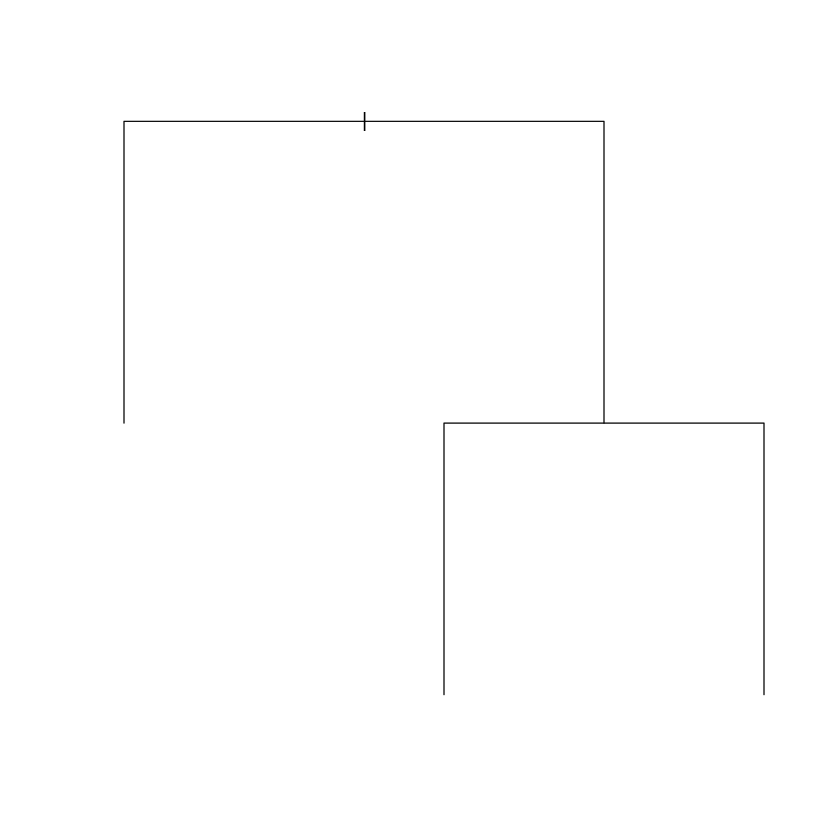

In [ ]:
# plot the decision tree after iteration 10 data
plot(iris.bagging$trees[[10]])

In [ ]:
# classify the iris data using the bagging model
baggingpred <- predict(iris.bagging, newdata=iris)
table(baggingpred$class, iris[,5])

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         45         1
  virginica       0          5        49

In [ ]:
# calculate the misclassification error
baggingtb <- table(baggingpred$class, iris[,5])
baggingerror.rpart <- 1-(sum(diag(baggingtb))/sum(baggingtb))
# misclassification error is 2.67%
baggingerror.rpart

[1] 0.04

## Boosting

In [ ]:
# mfinal is an integer which is the number of iterations for which boosting is run
iris.adaboost <- boosting(Species~., data = iris, boos = TRUE, mfinal = 10)

In [ ]:
# list the importance of variable in the classification
iris.adaboost$importance

Petal.Length  Petal.Width Sepal.Length  Sepal.Width 
   66.489301    20.327832     5.313200     7.869667

In [ ]:
# list the trees grown along the iterations.
iris.adaboost$trees

[[1]]
n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 98 setosa (0.34666667 0.31333333 0.34000000)  
  2) Petal.Length< 2.45 52  0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 98 47 virginica (0.00000000 0.47959184 0.52040816)  
    6) Petal.Length< 4.75 44  1 versicolor (0.00000000 0.97727273 0.02272727) *
    7) Petal.Length>=4.75 54  4 virginica (0.00000000 0.07407407 0.92592593) *

[[2]]
n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 150 90 versicolor (0.2533333 0.4000000 0.3466667)  
   2) Petal.Length< 2.7 38  0 setosa (1.0000000 0.0000000 0.0000000) *
   3) Petal.Length>=2.7 112 52 versicolor (0.0000000 0.5357143 0.4642857)  
     6) Petal.Width< 1.75 60  6 versicolor (0.0000000 0.9000000 0.1000000) *
     7) Petal.Width>=1.75 52  6 virginica (0.0000000 0.1153846 0.8846154)  
      14) Petal.Length< 4.85 8  2 versicolor (0.0000000 0.7500000 0.2500000) *
      15) Petal.Length>=

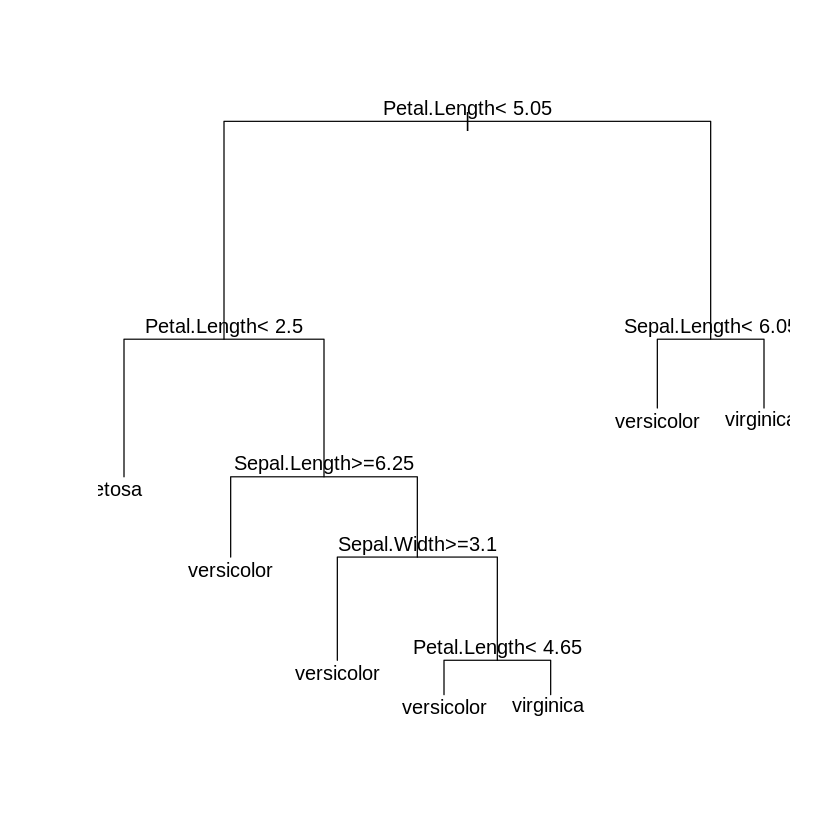

In [ ]:
# plot the decision tree after iteration 10 data
plot(iris.adaboost$trees[[10]])
text(iris.adaboost$trees[[10]])

In [ ]:
# classify the iris data using the adaboosting model
adaboostpred <- predict(iris.adaboost, newdata=iris)

In [ ]:
table(adaboostpred$class, iris[,5])

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         50         0
  virginica       0          0        50

In [ ]:
# calculate the misclassification error
adaboosttb <- table(adaboostpred$class, iris[,5])

In [ ]:
adaboosterror <- 1-(sum(diag(adaboosttb))/sum(adaboosttb))

In [ ]:
# misclassification error is 0%
adaboosterror

[1] 0

# Random Forest

In [ ]:
install.packages('randomForest')
library(randomForest)
data(iris)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.



In [ ]:
iris.forest <- randomForest(Species~., data=iris, ntree = 100, proximity=TRUE)

In [ ]:
# classify the iris data using the random forest model
table(predict(iris.forest), iris[,5])

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         47         3
  virginica       0          3        47

In [ ]:
foresttb <- table(predict(iris.forest), iris[,5])

In [ ]:
foresterror <- 1-(sum(diag(foresttb))/sum(foresttb))

In [ ]:
foresterror

[1] 0.04